# Titanic - Machine Learning from Disaster

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras
import os
from collections import Counter

for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))   

validation=pd.read_csv('input/test.csv', index_col=0)
data=pd.read_csv('input/train.csv', index_col=0)

input\gender_submission.csv
input\test.csv
input\train.csv
input\.ipynb_checkpoints\gender_submission-checkpoint.csv
input\.ipynb_checkpoints\test-checkpoint.csv
input\.ipynb_checkpoints\train-checkpoint.csv


## Data processing steps (skip that part and go to the function)

In [3]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Sex

In [241]:
# Male=0; Famale=1
data['Sex'].replace('female', 0, inplace=True)
data['Sex'].replace('male', 1, inplace=True)

### Age

mean value of age is 29.69911764705882
median value of age is 28.0
mode value of age is 24.0


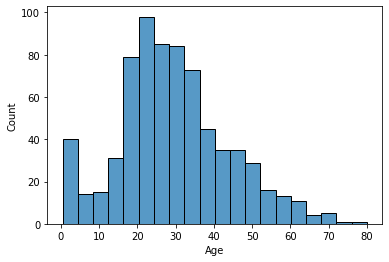

In [242]:
sns.histplot(data.Age)
#data.Age.plot.hist()

mean_age = data["Age"].mean()
median_age = data["Age"].median()
mode_age = data["Age"].mode().item()

print("mean value of age is",mean_age)
print("median value of age is",median_age)
print("mode value of age is",mode_age)

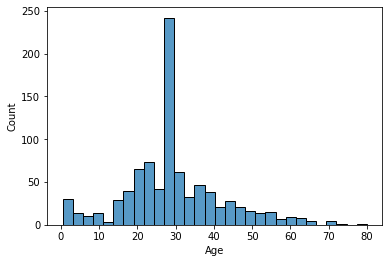

In [243]:
# Filling empty cells with median age value
data['Age'] = data['Age'].replace(np.nan, median_age)
sns.histplot(data.Age)

### Embarked

In [244]:
Counter = Counter(data['Embarked'])
most_common = Counter.most_common(1)
print(Counter)
print(most_common)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})
[('S', 644)]


In [245]:
# Fill empty cells with the most common value of Embarked
data['Embarked'] = data['Embarked'].replace(np.nan, 'S')

#data.Embarked.unique()
# data['EmbarkedS']=data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
# data['EmbarkedC']=data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
# data['EmbarkedQ']=data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)

# One Hot encoding columns:
dummies_embarked = pd.get_dummies(data.Embarked, prefix='Embarked_')
data = pd.concat([data, dummies_embarked], axis=1)

### Cabin

In [246]:
# Fill empty cells with X
data.Cabin.fillna('X', inplace=True)

# consider only the cabin letter
data.Cabin=data.Cabin.apply(lambda x: x[0])

# One Hot encoding columns:
dummies_cabin = pd.get_dummies(data.Cabin, prefix='Cabin_')
data = pd.concat([data, dummies_cabin], axis=1)

In [247]:
data.drop(['Embarked','Name','Ticket','Cabin'], axis=1, inplace=True, errors='ignore')

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__X
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
5,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0,0,1,0,0,0,0,0,0,0,0,1
888,1,1,0,19.0,0,0,30.0000,0,0,1,0,1,0,0,0,0,0,0,0
889,0,3,0,28.0,1,2,23.4500,0,0,1,0,0,0,0,0,0,0,0,1


## Data processing in function 

In [4]:
def data_processing(data):
    data['Sex'].replace('female', 0, inplace=True)
    data['Sex'].replace('male', 1, inplace=True)
    
    median_age = data["Age"].median()
    data['Age'] = data['Age'].replace(np.nan, median_age)
    
    data['Embarked'] = data['Embarked'].replace(np.nan, 'S')
    dummies_embarked = pd.get_dummies(data.Embarked, prefix='Embarked')
    data = pd.concat([data, dummies_embarked], axis=1)

    data.Cabin.fillna('X', inplace=True)
    data.Cabin=data.Cabin.apply(lambda x: x[0])
    dummies_cabin = pd.get_dummies(data.Cabin, prefix='Cabin')
    
    data = pd.concat([data, dummies_cabin], axis=1)
    data.drop(['Embarked','Name','Ticket','Cabin'], axis=1, inplace=True)
    return(data)

In [5]:
df_val = data_processing(validation)
df_train_and_test = data_processing(data)

In [6]:
df_val.columns, df_train_and_test.columns

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
        'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X'],
       dtype='object'),
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
        'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
        'Cabin_X'],
       dtype='object'))

In [7]:
# Additional preparing validation data:

#add missing columns from df_train_and_test to df_val
df_val[[x for x in df_train_and_test.columns if x not in df_val.columns]] = 0



## Data spliting

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_train_and_test.copy(), test_size=0.3, random_state=8)

y_train = df_train.pop('Survived')
X_train = df_train

y_test = df_test.pop('Survived')
X_test = df_test

df_val.pop('Survived')
X_val = df_val

In [9]:
# version for cross vaildate
y = df_train_and_test.pop('Survived')
X = df_train_and_test

## Modeling

### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import svm, datasets
# now you can import normally from model_selection
from sklearn.model_selection import GridSearchCV

tree_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(10, 16),
    "min_samples_leaf": range(5,9)
}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
#y_pred = clf.predict(X_test)

# Create cross validatpon & grid
cv_results = cross_validate(clf, X, y, cv=5)

grid = GridSearchCV(clf, param_grid=tree_param, cv=5, verbose=1, n_jobs=-1)

c = grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [20]:
print(pd.DataFrame(cv_results).mean())

print('best parameters:', grid.best_params_)

fit_time      0.010393
score_time    0.005246
test_score    0.783416
dtype: float64
best parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 6}


In [19]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_score
0,0.009986,0.008203,0.759777
1,0.011002,0.005006,0.758427
2,0.010988,0.005007,0.814607
3,0.009987,0.004021,0.764045
4,0.010002,0.003995,0.820225


In [21]:
#print('The best etimator score result is', grid.best_estimator_.score(X, y))
# Best result considering the average value of the crossing value:
print('The best score result is', grid.best_score_)

results = pd.DataFrame(grid.cv_results_)
results = results.iloc[:,4:]
results = results.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1)
results = results.sort_values(by='rank_test_score')
results

The best score result is 0.826093779423765


,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
13,entropy,13,6,0.826094,0.038598,1
1,entropy,10,6,0.823847,0.036530,2
5,entropy,11,6,0.823847,0.036530,2
17,entropy,14,6,0.823847,0.036530,2
41,gini,14,6,0.822723,0.035486,5
45,gini,15,6,0.821599,0.036163,6
29,gini,11,6,0.821599,0.036163,6
9,entropy,12,6,0.820476,0.037976,8
21,entropy,15,6,0.820476,0.034308,8
30,gini,11,7,0.819346,0.038258,10


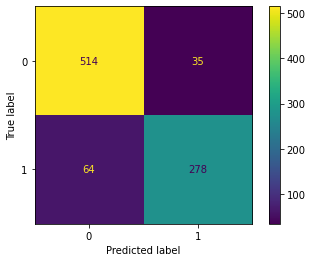

In [25]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(grid, X, y)
# plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid, X, y)
plt.show()

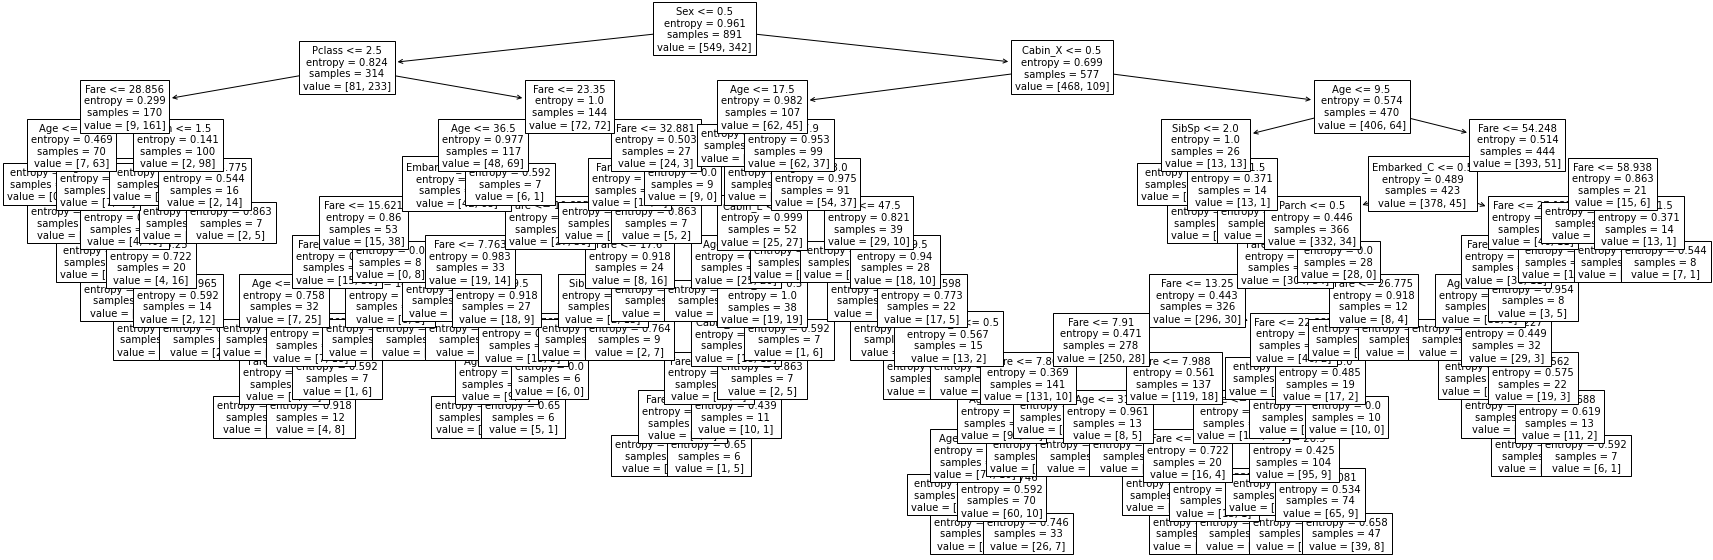

In [24]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(30,10))
tree.plot_tree(grid.best_estimator_, ax=ax,  fontsize=10, feature_names=df_train.columns)
plt.show()

## Algorithm prediction - validation data 

In [370]:
y_pred = grid.predict(X_val)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [378]:
# column reorder
X_val = X_val[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C','Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D','Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X']]

# Fill empty cells with mean value
X_val.Fare = X_val.Fare.fillna(X.Fare.mean())

In [371]:
import pandas as pd  
  
# assign data of lists.  
my_predictions = {'PassengerId': range(892,1310), 'Survived': y_pred}  
  
# Create DataFrame  
my_predictions = pd.DataFrame(my_predictions)  
  
# Print the output.  
print(my_predictions)  

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [372]:
import os  
os.makedirs('output', exist_ok=True)  
my_predictions.to_csv('output/submission.csv', index=False)  